In [ ]:
from __future__ import print_function, division
import pandas as pd
import random
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import shapiro
import math
import statsmodels.api as sm
import pylab
from scipy.stats import poisson
import seaborn as sb
from scipy.stats import uniform
from scipy.integrate import quad
from numpy import sqrt,abs,round
import statistics
from scipy.stats import geom
from pylab import rcParams
from scipy import stats
import seaborn as sns
import warnings
from scipy.stats import f_oneway
from scipy.stats import ttest_ind


In [ ]:
from google.colab import files

books = pd.read_csv('bestsellers with categories.csv')      
print(books)  

                                                  Name  ...        Genre
0                        10-Day Green Smoothie Cleanse  ...  Non Fiction
1                                    11/22/63: A Novel  ...      Fiction
2              12 Rules for Life: An Antidote to Chaos  ...  Non Fiction
3                               1984 (Signet Classics)  ...      Fiction
4    5,000 Awesome Facts (About Everything!) (Natio...  ...  Non Fiction
..                                                 ...  ...          ...
545       Wrecking Ball (Diary of a Wimpy Kid Book 14)  ...      Fiction
546  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
547  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
548  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction
549  You Are a Badass: How to Stop Doubting Your Gr...  ...  Non Fiction

[550 rows x 7 columns]


Shapiro-Wilk Test

In [ ]:
df=pd.DataFrame(books,columns=['Price'])
print(df)

     Price
0        8
1       22
2       15
3        6
4       12
..     ...
545      8
546      8
547      8
548      8
549      8

[550 rows x 1 columns]


In [ ]:
print(shapiro(df))


(0.7021757364273071, 4.6924700049796994e-30)


In [ ]:
print("The column PRICE is not Normally distributed as Pvalue is not greater than 0.05")

The column PRICE is not Normally distributed as Pvalue is not greater than 0.05


Finding the Normality

In [ ]:
m= df['Price'].mean()
print("Mean of Price=",m)

Mean of Price= 13.1


In [ ]:
SD=statistics.stdev(df['Price'])
print("Standard Deviation of Price=",SD)

Standard Deviation of Price= 10.84226197842236


In [ ]:
Median=np.median(df['Price'])
print("Median of Price=",Median)

Median of Price= 11.0


In [ ]:
Mode=statistics.mode(df['Price'])
print("Mode of Price=",Mode)

Mode of Price= 8


Mean, Median, Mode are not equal to each other. So, the column PRICE is not Normally distributed.

Normal Distribution

In [ ]:
x=np.linspace(10,500)
def normal_dist(df,m,SD):
  prob_density=(np.pi*SD)*np.exp(-2*((x-m)/SD)**2)
  return prob_density



In [ ]:
pdf=normal_dist(df,m,SD)


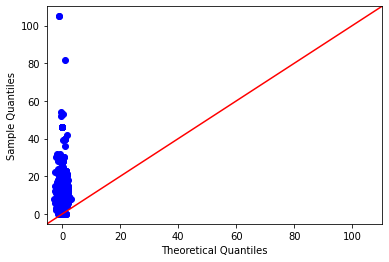

In [ ]:
sm.qqplot(df, line='45')
pylab.show()

Text(0, 0.5, 'Probability Density')

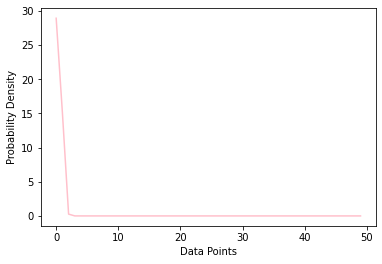

In [ ]:
plt.plot(pdf, color='pink')
plt.xlabel('Data Points')
plt.ylabel('Probability Density')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdb032aee50>]],
      dtype=object)

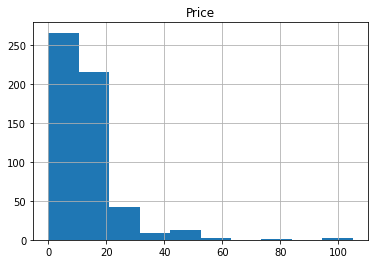

In [ ]:
df.hist()

Poisson Distribution

In [ ]:
df=pd.DataFrame(books,columns=['User Rating'])
print(df)

     User Rating
0            4.7
1            4.6
2            4.7
3            4.7
4            4.8
..           ...
545          4.9
546          4.7
547          4.7
548          4.7
549          4.7

[550 rows x 1 columns]


In [ ]:
print(shapiro(df))

(0.871863842010498, 7.478150561592655e-21)


In [ ]:
s=books.Price.sum()
c=books.Price.count()
prob=s/c
print("Probability:",prob)

Probability: 13.1


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Frequency'), Text(0.5, 0, 'Poisson Distribution')]

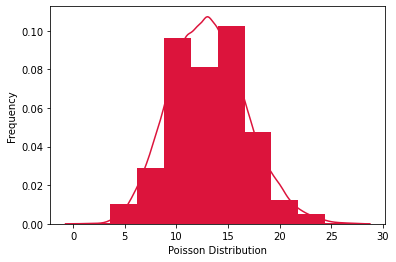

In [ ]:
books_poisson= poisson.rvs(mu=13.1, size=10000)
ax= sb.distplot(books_poisson,
                bins=10,
                kde=True,
                color='crimson',
                hist_kws={"linewidth": 25,'alpha':1})
ax.set(xlabel='Poisson Distribution', ylabel='Frequency')

Correlation

In [ ]:
books[['Reviews','Price']].corr()

,Reviews,Price
Reviews,1.000000,-0.109182
Price,-0.109182,1.000000


Uniform Distribution

In [ ]:
M= max(df['Price'])
m=min(df['Price'])
print('Maximum price=',M)
print('Minimum= price=',m)

Maximum price= 105
Minimum= price= 0


In [ ]:
numargs= uniform. numargs
a,b=0, 105

Distribution :
 [0.         0.02040816 0.04081633 0.06122449 0.08163265 0.10204082
 0.12244898 0.14285714 0.16326531 0.18367347 0.20408163 0.2244898
 0.24489796 0.26530612 0.28571429 0.30612245 0.32653061 0.34693878
 0.36734694 0.3877551  0.40816327 0.42857143 0.44897959 0.46938776
 0.48979592 0.51020408 0.53061224 0.55102041 0.57142857 0.59183673
 0.6122449  0.63265306 0.65306122 0.67346939 0.69387755 0.71428571
 0.73469388 0.75510204 0.7755102  0.79591837 0.81632653 0.83673469
 0.85714286 0.87755102 0.89795918 0.91836735 0.93877551 0.95918367
 0.97959184 1.        ]


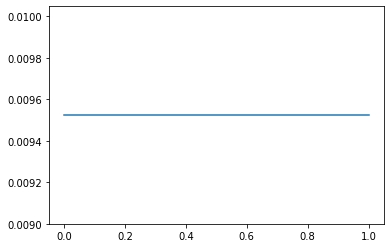

In [ ]:
rv= uniform (a,b)
distribution= np.linspace(0, np.minimum(rv.dist.b, 3))
print("Distribution :\n",distribution)
plot=plt.plot(distribution, rv.pdf(distribution))

Calculating probabilities

In [ ]:
def pdf(x):
  a=0
  b=105
  if (x>=a and x<=b):
    pdf=1/(b-a)
  else:
      pdf=0
  return pdf

In [ ]:
#calculating probabilities
p,err=quad(pdf,0,25)
print("Probability that the price is atmost 25:",round(p,3))
q,err=quad(pdf,25,75)
print("Probability that the price is between 25 to 75:",round(q,3))
r,err=quad(pdf,75,105)
print("Probability that the price is between 75 to 105:",round(r,3))

Probability that the price is atmost 25: 0.238
Probability that the price is between 25 to 75: 0.476
Probability that the price is between 75 to 105: 0.286


Geometric Distribution

In [ ]:
x=[1,2,3,4,5]
p=0.994
geom_pd= geom.pmf(x,p)


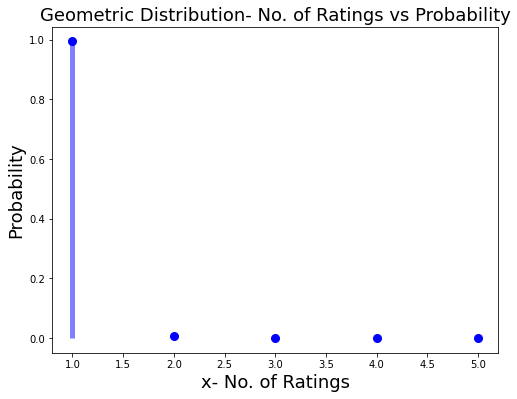

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,6))
ax.plot(x,geom_pd, 'bo', ms=8, label='geom pmf')
plt.ylabel("Probability", fontsize="18")
plt.xlabel("x- No. of Ratings", fontsize="18")
plt.title("Geometric Distribution- No. of Ratings vs Probability", fontsize="18")
ax.vlines(x, 0, geom_pd, colors='b', lw=5, alpha=0.5)


In [ ]:
#importing the modules
%matplotlib inline


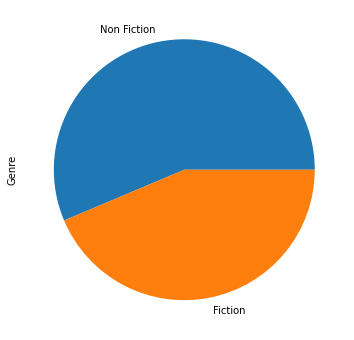

In [ ]:
books['Genre'].value_counts().plot(kind='pie', figsize=(6,6))

Text(0, 0.5, 'Books')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 146 missing from current font.
  font.set_text(s, 0, flags=flags)


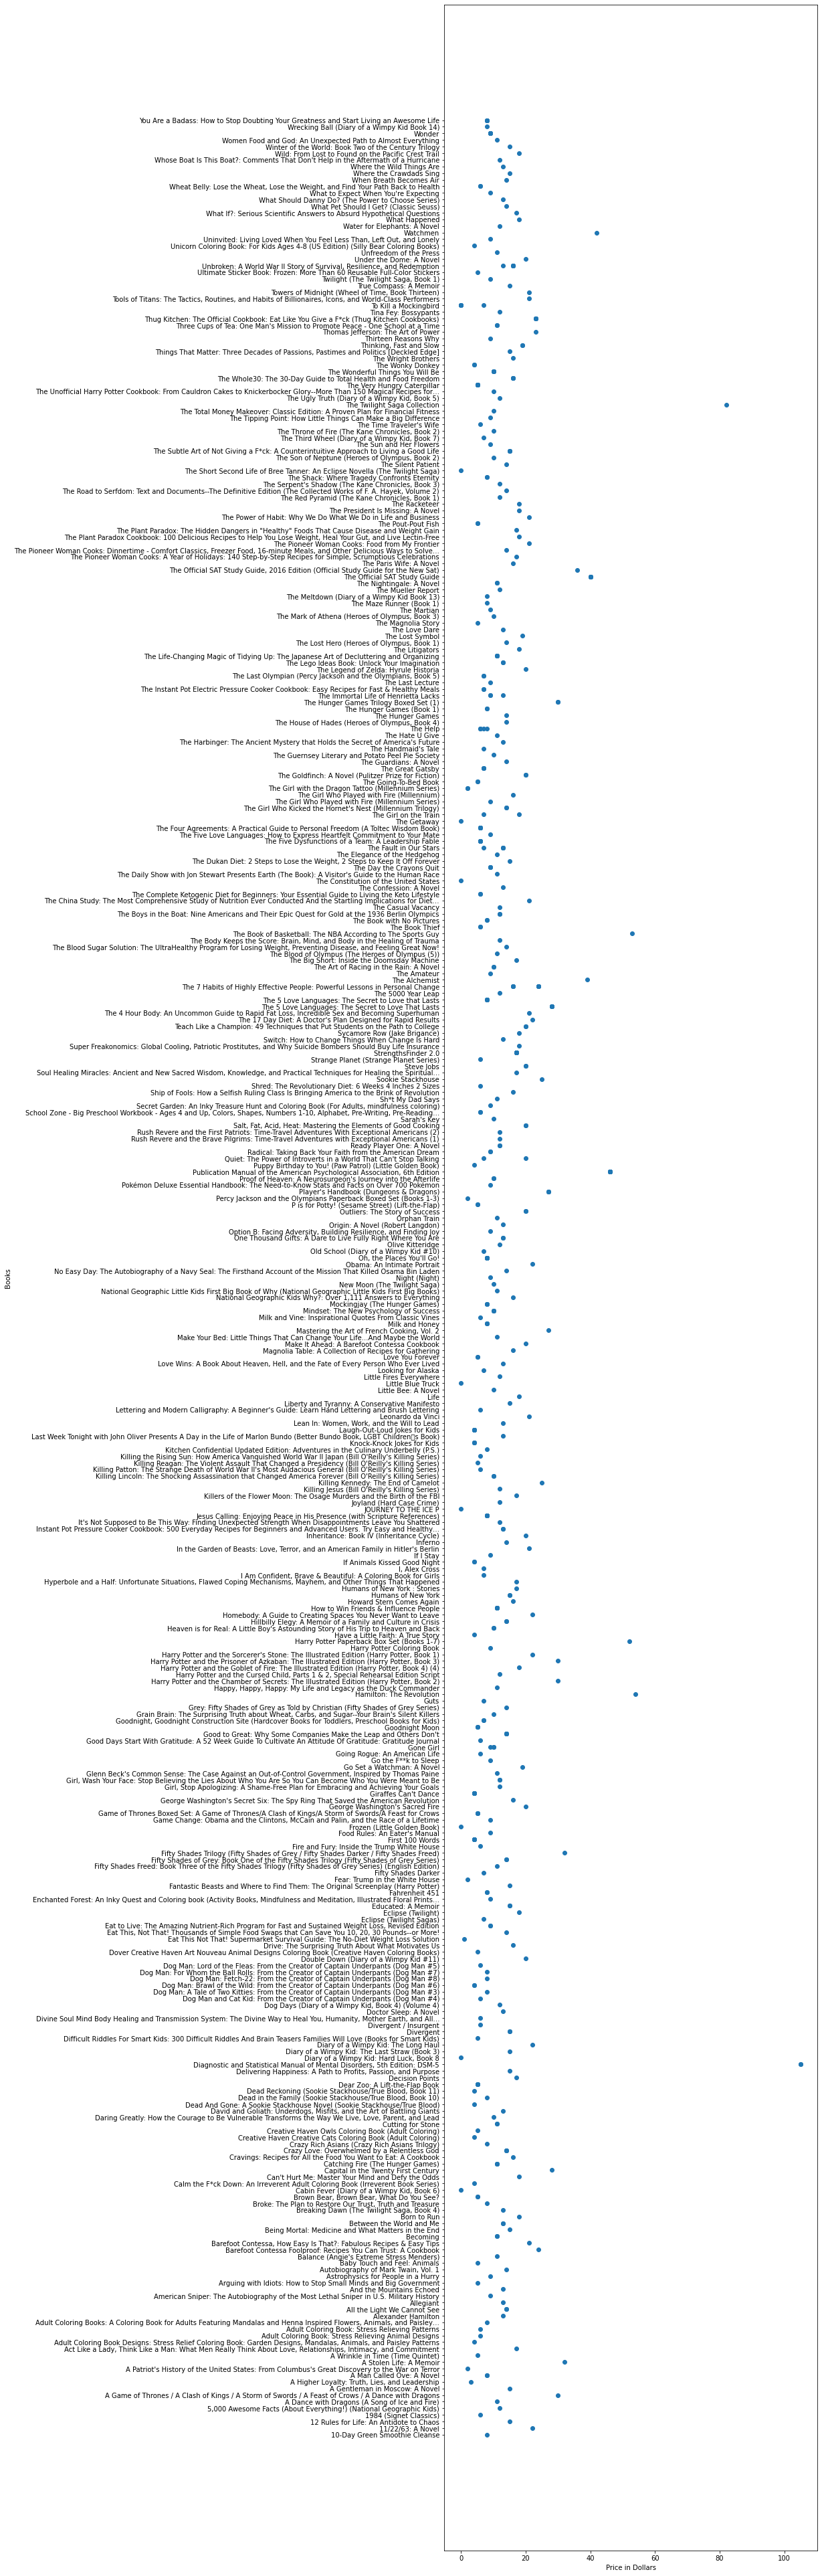

In [ ]:
fig, ax = plt.subplots(figsize=(10,70))
df=pd.DataFrame(books,columns=['Name','Author','User Rating','Reviews','Price','Year'])
plt.scatter(df.Price,df.Name)
plt.xlabel("Price in Dollars")
plt.ylabel("Books")

Text(0, 0.5, 'Author')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 133 missing from current font.
  font.set_text(s, 0, flags=flags)


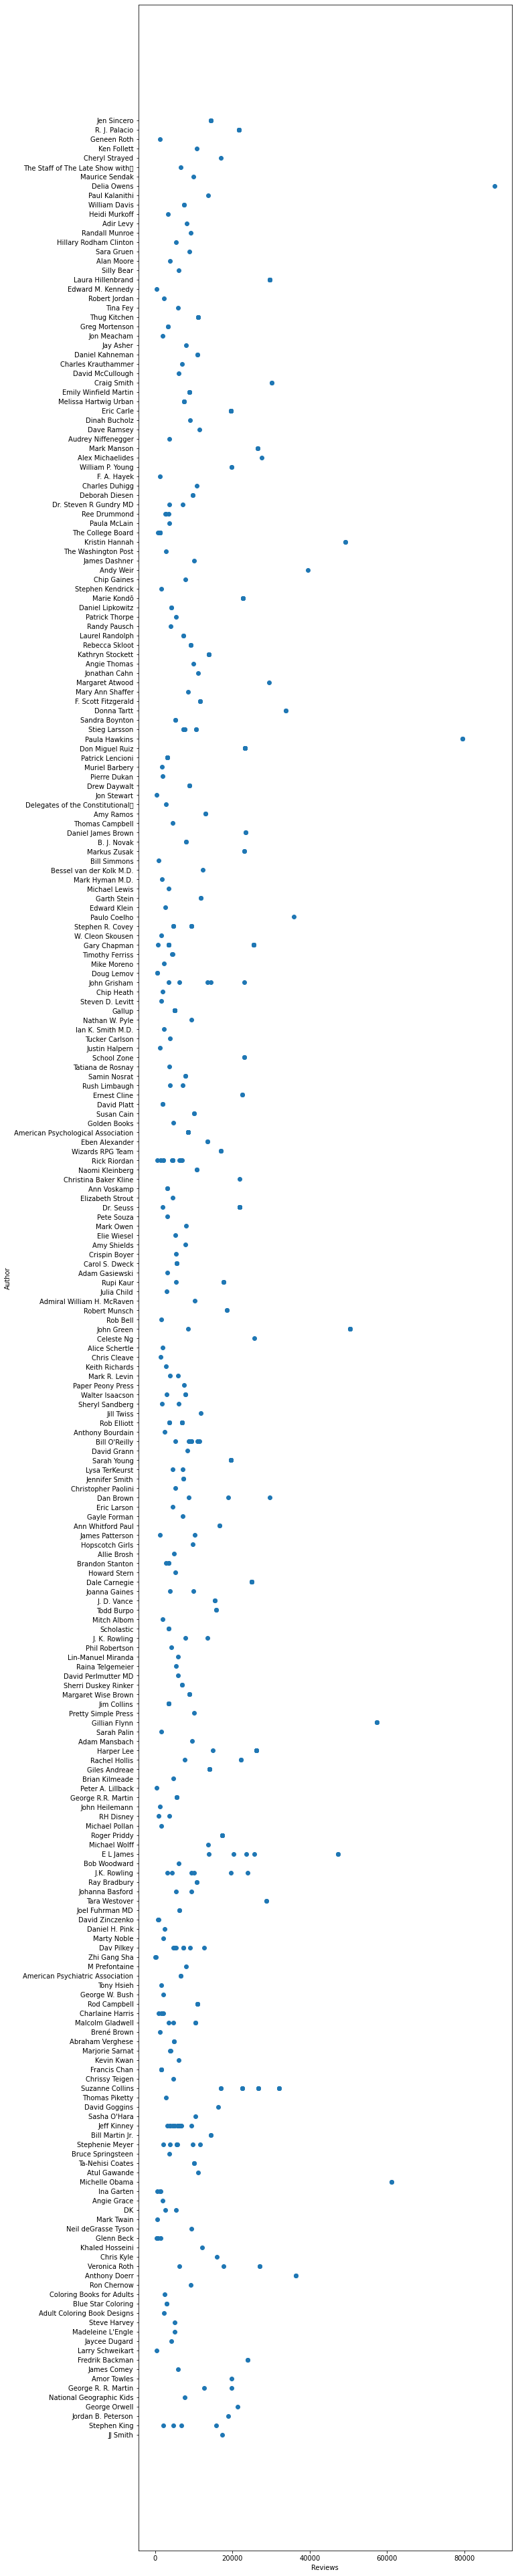

In [ ]:
fig, ax = plt.subplots(figsize=(10,70))
df=pd.DataFrame(books,columns=['Name','Author','User Rating','Reviews','Price','Year'])
plt.scatter(df.Reviews,df.Author)
plt.xlabel("Reviews")
plt.ylabel("Author")

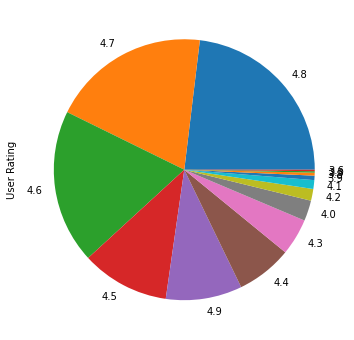

In [ ]:
books['User Rating'].value_counts().plot(kind='pie', figsize=(6,6))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


[Text(0, 0.5, 'Price in Dollars'), Text(0.5, 0, 'Genre')]

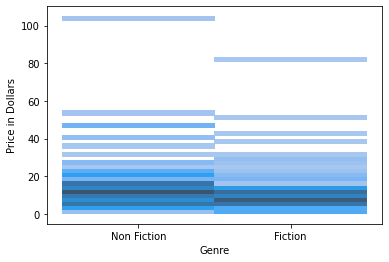

In [ ]:
 
histo = sns.histplot(y ="Price", x ="Genre", data = books);
histo.set(ylabel = 'Price in Dollars', xlabel = 'Genre')